1. Implement Naïve Bayes method using scikit-learn library

* Use dataset available with name glass
* Use train_test_split to create training and testing part
* Evaluate the model on test part using score and

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load the glass dataset
glass_data = pd.read_csv("/content/glass.csv")

In [ ]:
glass_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
#display null values and data types
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
#look at distribution of data
glass_data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
#numerical features
numerical = [
    'RI',
    'Na',
    'Mg',
    'Al',
    'Si',
    'K',
    'Ca',
    'Ba',
    'Fe'
]

#categorical features
categorical = [
    'Type'
]

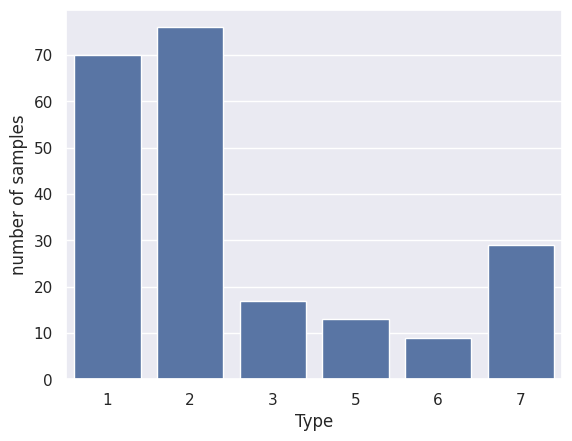

In [ ]:
#look at categorical data distribution
for i in glass_data[categorical].columns:
    sns.barplot(x=glass_data[categorical][i].value_counts().index,y=glass_data[categorical][i].value_counts())
    plt.xlabel(i)
    plt.ylabel('number of samples')
    plt.show()

In [ ]:
#remove target variable from categorical array
categorical.remove('Type')

#change dtype of categorical features to object
glass_data[categorical]=glass_data[categorical].astype('object')

#copy of variables and target
X = glass_data.copy()
y = X.pop('Type')

In [ ]:
X_mi = X.copy()

In [ ]:
#label encoding for categorical variables
for colname in X_mi.select_dtypes("object"):
    X_mi[colname], _ = X_mi[colname].factorize()

#all discrete features have int dtypes
discrete_features = X_mi.dtypes == int

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naïve Bayes model
nb_model = GaussianNB()

# Train the model on the training set
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5581395348837209


In [ ]:
# Classification Report for Naïve Bayes
report = metrics.classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           1       0.41      0.64      0.50        11
           2       0.43      0.21      0.29        14
           3       0.40      0.67      0.50         3
           5       0.50      0.25      0.33         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.56        43
   macro avg       0.60      0.63      0.59        43
weighted avg       0.55      0.56      0.53        43



2. Implement linear SVM method using scikit library

* Use the same dataset above
* Use train_test_split to create training and testing part
* Evaluate the model on test part using score and

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC(kernel='linear')

# Train the model on the training set
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.74


In [ ]:
# Classification Report SVC
report = metrics.classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           1       0.69      0.82      0.75        11
           2       0.67      0.71      0.69        14
           3       0.00      0.00      0.00         3
           5       0.80      1.00      0.89         4
           6       1.00      0.67      0.80         3
           7       0.88      0.88      0.88         8

    accuracy                           0.74        43
   macro avg       0.67      0.68      0.67        43
weighted avg       0.70      0.74      0.72        43

